## Multilayer Perceptron (Deep Neural Network) Using Tensorflow

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/5_Deep_Neural_Network/Task2_Deep_NN_Tensorflow.ipynb)

Task: Build a multilayer perceptron using `tensorflow` and `keras` for the [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) classification problem. 
- The Fashion MNIST is multi class problem. The dataset contains 10 classes which represent different fashion products. 
- The neural network should be able to predict the fashion category of the product when given an image.
- A description of each label is given as:
 
**Label:Description**

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot

In [2]:
#Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import math
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import Adam
from keras.layers import Dropout

#### Import Dataset
We'll use `tensorflow.keras.datasets` to import the `fashion_mnist` dataset.

In [3]:
# Load the dataset
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Data Visualization/Exploration
The figures show some of the images from the training dataset and their respective labels. 
- The images are grayscale, each pixel value has a range from 0 to 255. The images are normalized by dividing by 255.

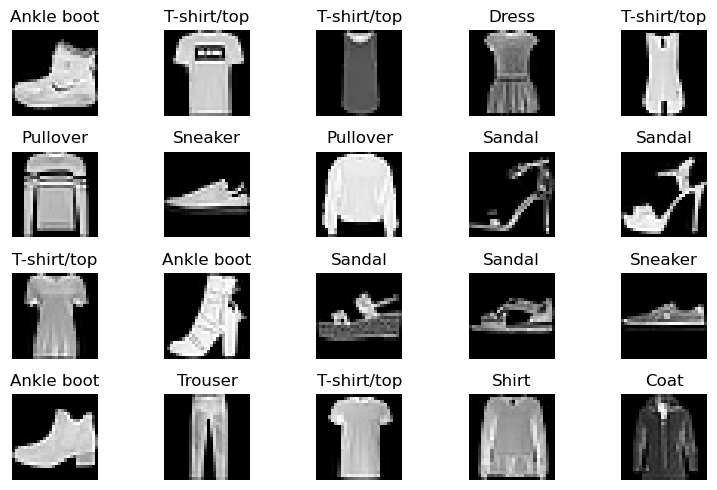

In [4]:
# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Scale pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

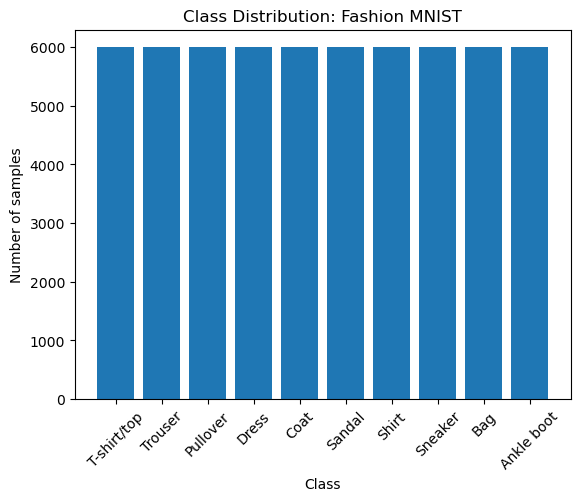

In [5]:
# Count the number of samples in each class
class_counts = np.bincount(y_train)
# Plot a bar chart of the class distribution
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution: Fashion MNIST')
plt.show()

**Class distribution**: The bar chart of the class distribution shows that the classes are evenly represented in the dataset.

### Data Preprocessing

- The labels are one-hot encoded. 

In [6]:
# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# One-hot encode the labels using keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Neural Network Architecture

#### Implementation
We'll use a simple feedforward neural network with two hidden layers, with 128 and 64 nodes and ReLU activation functions. The output layer will have 10 nodes (one for each class) with a softmax activation function.
1. The first layer, `Flatten`, transforms the 28x28 input images into a 784-element vector. The output of this layer is then fed into two dense (fully connected) layers, each with a rectified linear unit (ReLU) activation function. 
2. The final layer is a dense layer with `num_classes` units, where `num_classes` is the number of classes in the Fashion MNIST dataset (10 in this case). This layer uses a softmax activation function to output a probability distribution over the classes.
3. The model summary shows the shape of the output of each layer in the model, as well as the number of parameters in each layer. 

In [15]:
# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#### Training the model
Compile and train the model. Provide a loss plot for training and validation. The validation split indicates that 20% of the training data will be used for validation, and the training progress will be monitored on both the training and validation sets.

In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6115 - accuracy: 0.7914 - val_loss: 0.4732 - val_accuracy: 0.8337
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8461 - val_loss: 0.4267 - val_accuracy: 0.8552
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8590 - val_loss: 0.4013 - val_accuracy: 0.8635
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8656 - val_loss: 0.3904 - val_accuracy: 0.8622
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8702 - val_loss: 0.3816 - val_accuracy: 0.8655
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8755 - val_loss: 0.4021 - val_accuracy: 0.8598
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8785 - val_loss: 0.3719 - val_accuracy: 0.8756
Epoch 

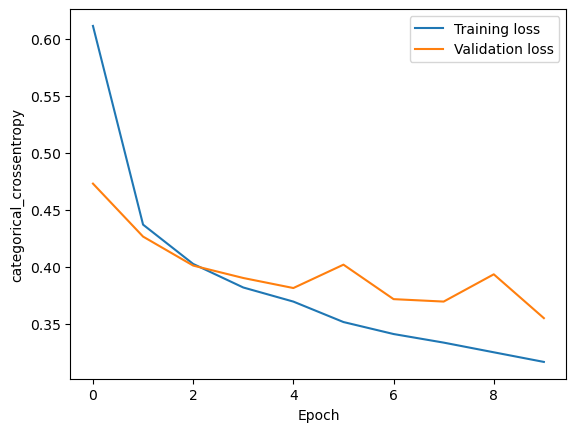

In [17]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()

The model overfits the data after few epochs. 

### Performance Evaluation
- Make prediction on testset and calculate testing accuracy
- Use a random set of images from the testset to visualize the actual vs predicted comparison

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8657
Test accuracy: 0.8657000064849854
313/313 [==============================] - 0s 913us/step


#### Performance Improvement (K-Cross Validation and Hyperparameter Tuning)
In the previous sections, we have built a deep learning model using Keras and trained it on the Fashion MNIST dataset. We have used a Sequential model and added Dense and Flatten layers to it. 

In this section, we will focus on improving the performance of our model. We will use techniques like K-Cross Validation and Hyperparameter Tuning. K-Cross Validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.

We will also visualize the performance of our model using matplotlib, a plotting library for the Python programming language. We will plot the training and validation loss and accuracy to better understand the performance of our model.

In [22]:
def create_model(learning_rate=0.001, neurons=128, layers=2):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Input layer
    for _ in range(layers):
        model.add(Dense(neurons, activation='relu'))  # Add specified number of dense layers
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=64, verbose=0)

C:\Users\kashi\AppData\Local\Temp\ipykernel_21708\3126341615.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=64, verbose=0)


We use GridSeachCV to implement cross validation (Cv=3) and hyperparameetr tuning.

In [23]:
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01]
    'neurons': [64, 128, 256],
    'layers': [2, 3]  
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.874733 using {'layers': 2, 'learning_rate': 0.001, 'neurons': 128}
0.677500 (0.027674) with: {'layers': 2, 'learning_rate': 1e-05, 'neurons': 32}
0.725883 (0.006515) with: {'layers': 2, 'learning_rate': 1e-05, 'neurons': 64}
0.772433 (0.002722) with: {'layers': 2, 'learning_rate': 1e-05, 'neurons': 128}
0.832767 (0.001285) with: {'layers': 2, 'learning_rate': 0.0001, 'neurons': 32}
0.847033 (0.004398) with: {'layers': 2, 'learning_rate': 0.0001, 'neurons': 64}
0.857600 (0.002091) with: {'layers': 2, 'learning_rate': 0.0001, 'neurons': 128}
0.862833 (0.002826) with: {'layers': 2, 'learning_rate': 0.001, 'neurons': 32}
0.872467 (0.009175) with: {'layers': 2, 'learning_rate': 0.001, 'neurons': 64}
0.874733 (0.002821) with: {'layers': 2, 'learning_rate': 0.001, 'neurons': 128}
0.648483 (0.044958) with: {'layers': 3, 'learning_rate': 1e-05, 'neurons': 32}
0.731800 (0.006839) with: {'layers': 3, 'learning_rate': 1e-05, 'neurons': 64}
0.787033 (0.001435) with: {'layers': 3, 'learning_

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.8155 - val_loss: 0.4128 - val_accuracy: 0.8548
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3789 - accuracy: 0.8644 - val_loss: 0.3712 - val_accuracy: 0.8658
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.8767 - val_loss: 0.3496 - val_accuracy: 0.8735
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3164 - accuracy: 0.8828 - val_loss: 0.3314 - val_accuracy: 0.8795
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2915 - accuracy: 0.8925 - val_loss: 0.3225 - val_accuracy: 0.8849
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2771 - accuracy: 0.8972 - val_loss: 0.3454 - val_accuracy: 0.8801
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2660 - accuracy: 0.9018 - val_loss: 0.3602 - val_accuracy: 0.8711
Epoch 

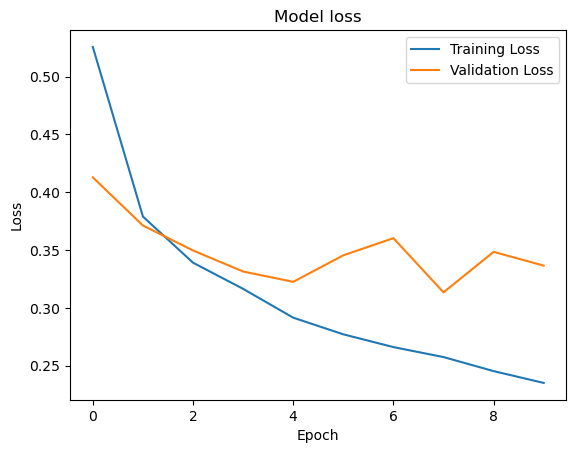

Test Accuracy: 87.55999803543091%


In [24]:
best_params = grid_result.best_params_
best_learning_rate = best_params['learning_rate']
best_neurons = best_params['neurons']
best_layers = best_params['layers']

# Re-create the best model
model = create_model(learning_rate=best_learning_rate, neurons=best_neurons, layers=best_layers)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100}%")

In [ ]:
# Define a function to plot images with their true and predicted labels
def plot2(images, y_true, y_pred=None):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        # Plot image
        x = images[i]
        ax.imshow(x, cmap=plt.cm.binary)

        # Set title with true label
        ax.set_title(f"Actual: {class_names[np.argmax(y_true[i])]}")
        
        # If predicted labels are provided, set subtitle with predicted label
        if y_pred is not None:
            ax.set_xlabel(f"Pred: {class_names[y_pred[i]]}")

        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
# Choose 10 random images from the test set
rand_idxs = np.random.permutation(len(x_test))[:10]

# Plot the images with their true and predicted labels
plot2(x_test[rand_idxs], y_test[rand_idxs], y_pred_labels[rand_idxs])


## Conclusion
Here we implemented a multilayer feed forward netwrok using `tensorflow.keras` to classify the Fashion MNIST data. The data was scaled and preprocessed before training using techniques such as one-hot encoding. The following are the findings:
- The baseline model showed some overfitting and had testing acucuracy of 86%.
- The model was then improved using cross-validation and hyperparameter tunin. After which it was able to able to achieve a testing accuracy of approximately 88%. 
- 10 random images from the testset were used as a comparison, the model made 9 correct prediction out of 10 images. 